<a href="https://colab.research.google.com/github/tranhuonggiang22/Machine-learning/blob/main/ML_LESSON4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_theme()

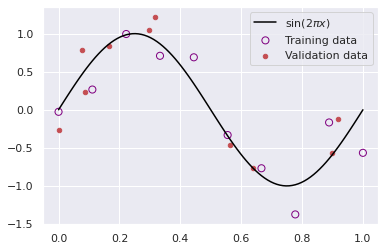

In [6]:
def create_toy_data(func, sample_size, std, rand = False):
    if rand:
      x = np.random.random((1, sample_size))[0]
    else:
      x = np.linspace(0, 1, sample_size).T
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2*np.pi*x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_val, y_val = create_toy_data(func, 10, 0.25, True)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="purple", s=50, label="Training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="Validation data")
plt.plot(x_test, y_test, c="black", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [7]:
class LinearRegression:
    def train(self, X, y):
        self.X = np.c_[X, np.ones(X.shape[0])]
        inverse_mat = np.linalg.inv(np.dot(self.X.T, self.X))
        self.coef_mat = np.dot(np.dot(inverse_mat, self.X.T), y)
        
    def fit(self, X=None):
        if X is not None:
            return np.dot(np.c_[X, np.ones(X.shape[0])], self.coef_mat)
        return np.dot(self.X, self.coef_mat)
    
    def mse(self, model, y):
        return np.power(model - y, 2).sum()/y.shape[0]

In [8]:
def degree(X, deg):
  if deg == 1:
    return X
  if len(X.shape) == 1:
    return degree(np.column_stack((X, np.power(X, deg))), deg-1)
  return degree(np.column_stack((X, np.power(X[:,0], deg))), deg-1)

Train loss: 0.3022767132995643
Val loss: 0.35021063847698747


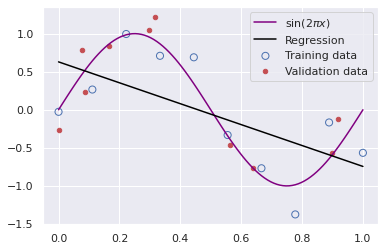

In [9]:
#BAC 1
x = LinearRegression()
x.train(x_train, y_train)
fitted = x.fit(x_test)

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(x_val), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="Training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="Validation data")
plt.plot(x_test, y_test, c="purple", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='black', label ="Regression")
plt.legend()
plt.show()

Train loss: 0.10834623007986548
Val loss: 0.10875497753111125


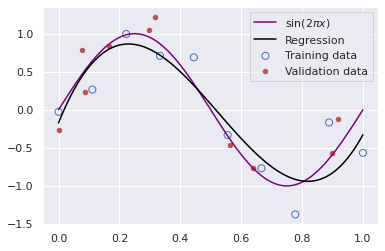

In [10]:
#BAC3
x = LinearRegression()
x.train(degree(x_train, 3), y_train)
fitted = x.fit(degree(x_test, 3))

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(degree(x_val, 3)), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="Training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="Validation data")
plt.plot(x_test, y_test, c="purple", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='black', label ="Regression")
plt.legend()
plt.show()

Train loss: 1.205481872939234e-07
Val loss: 0.9271096036964762


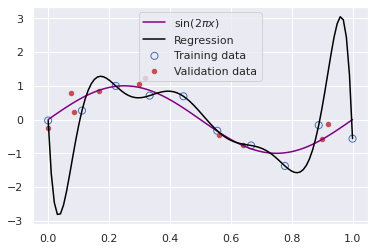

In [11]:
#BAC9
x = LinearRegression()
x.train(degree(x_train, 9), y_train)
fitted = x.fit(degree(x_test, 9))

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(degree(x_val, 9)), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="Training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="Validation data")
plt.plot(x_test, y_test, c="purple", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='black', label ="Regression")
plt.legend()
plt.show()

**Conclusion**

Model bậc 1 có MSE quá lớn, model không hấp thụ được đặc điểm của data => UNDERFITTING

Model bậc 3 có MSE chấp nhận được, MSE giữa train data và validation data không chênh lệch quá nhiều => HỢP LÝ

Model bậc 9 có MSE train data rất nhỏ, nhưng MSE validation data rất lớn => OVERFITTING

Train loss: 0.059733251300685186
Val loss: 0.06270917194886064


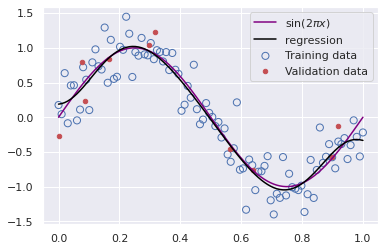

In [12]:
x_train, y_train = create_toy_data(func, 100, 0.25)

x = LinearRegression()
x.train(degree(x_train, 9), y_train)
fitted = x.fit(degree(x_test, 9))

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(degree(x_val, 9)), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="Training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="Validation data")
plt.plot(x_test, y_test, c="purple", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='black', label ="regression")
plt.legend()
plt.show()

**Thêm 100 điểm dữ liệu => Hết OVERFITTING**